### _**TAKE ROOT PROJECT**_
- Import the _libraries_ that we must need for the process of the project

In [4]:
# Import the basics of data analysis to take control of the different types of data
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#### _**IMPORT OUR DATASET**_
- We're working with a _**Dane's dataset of employment**_ data in different departments and cities in Colombia

In [5]:
excel_data = pd.ExcelFile(r'C:\Users\Juan Pablo\Desktop\Clases\Bases de datos Avanzadas\data\DatosEmpleo.xlsx')

##### _**--> IMPORTANT**_
- We have in our excel file different books, the _**first thing**_:
- Prepare the book and look what is most suitable information for the use case of the project, _in this case we're gonna look forwar to know the City's information_ 

In [6]:
# To view the different sheet names in the excel file we can use the following command
print(excel_data.sheet_names)

['Indice', 'Ficha Metodológica', 'Código_SAS', 'Código_STATA', 'Grandes dominios ', 'Prop informalidad', 'Total nacional', 'Ciudades', 'Sexo', 'Educación ', 'Ramas de actividad CIIU 4 A.C', 'Posición ocupacional', 'Lugar de trabajo', 'Tamaño de empresa', 'Seguridad social Tnal', 'Seguridad social 13 ciudades ', 'Errores relativos']


## _***CLEANING***_
- Look if there's some _missing values, NaN values_ and all different types of data that we really don't want to handle
- _**EDA**_, handle the data and see some _patterns of any distinc information_ that is helpful for this situation _(Emloyment per city)_


In [7]:
df_sheet1 = excel_data.parse('Ciudades') # We read the sheet named ('Ciudades')
df_sheet1_cleaned = df_sheet1.dropna() # We drop the rows with NaN values
df_sheet1_cleaned = df_sheet1_cleaned.reset_index(drop=True) # We reset the index
df_sheet1_cleaned = df_sheet1_cleaned.rename(columns={'Unnamed: 0':'Ciudad'}) # We rename the first column
df_sheet1_cleaned = df_sheet1_cleaned.rename(columns={'Unnamed: 1':'Situacion'}) # We rename the first column
df_sheet1_cleaned['Ciudad']

0     13 ciudades y A.M.
1            Bogotá D.C.
2          Medellín A.M.
3              Cali A.M.
4      Barranquilla A.M.
5       Bucaramanga A.M.
6         Manizales A.M.
7                  Pasto
8           Pereira A.M.
9            Cúcuta A.M.
10                Ibagué
11              Montería
12             Cartagena
13         Villavicencio
14                 Tunja
15             Florencia
16               Popayán
17            Valledupar
18                Quibdó
19                 Neiva
20              Riohacha
21           Santa Marta
22               Armenia
23             Sincelejo
24    23 ciudades y A.M.
Name: Ciudad, dtype: object

In [8]:
# We can also use the following command to remove the 'A.M.' string from the 'Ciudad' column
df_sheet1_cleaned['Ciudad'] = df_sheet1_cleaned['Ciudad'].str.replace('A.M.', '', regex=False).str.strip()
df_sheet1_cleaned.drop([0,24], inplace=True) # We drop the rows with index 0 and 25

In [9]:
df_sheet1_cleaned.to_csv(r'C:\Users\Juan Pablo\Desktop\Clases\Bases de datos Avanzadas\data\DatosEmpleo_Ciudades.csv', index=False) # We save the cleaned data to a csv file

In [10]:
# Create a list of month names
months = [
    'Enero 2021', 'Febrero 2021', 'Marzo 2021', 'Abril 2021', 'Mayo 2021', 'Junio 2021',
    'Julio 2021', 'Agosto 2021', 'Septiembre 2021', 'Octubre 2021', 'Noviembre 2021', 'Diciembre 2021',
    'Enero 2022', 'Febrero 2022', 'Marzo 2022', 'Abril 2022', 'Mayo 2022', 'Junio 2022',
    'Julio 2022', 'Agosto 2022', 'Septiembre 2022', 'Octubre 2022', 'Noviembre 2022', 'Diciembre 2022',
    'Enero 2023', 'Febrero 2023', 'Marzo 2023', 'Abril 2023', 'Mayo 2023', 'Junio 2023',
    'Julio 2023', 'Agosto 2023', 'Septiembre 2023', 'Octubre 2023', 'Noviembre 2023', 'Diciembre 2023',
    'Enero 2024', 'Febrero 2024', 'Marzo 2024', 'Abril 2024', 'Mayo 2024', 'Junio 2024',
    'Julio 2024', 'Agosto 2024', 'Septiembre 2024', 'Octubre 2024', 'Noviembre 2024', 'Diciembre 2024'
]
months_counter = 0 # We create a counter to iterate over the months list
current_columns = df_sheet1_cleaned.columns
current_columns

Index(['Ciudad', 'Situacion', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42'],
      dtype='object')

#### _**--> CONTEXT**_
- We already know that we have some unnamed columns, if we _really did our EDA_ and found out that we have every month of the year from _**2021 to 2024**_ we can rename our columns with the _**months of the year**_

In [11]:
# Create a dictionary to map the 'Unnamed' columns to the corresponding month names
rename_dict = {f'Unnamed: {i+2}': months[i] for i in range(len(months))}

# Rename the columns in the DataFrame
df_sheet1_cleaned.rename(columns=rename_dict, inplace=True)

# Display the updated columns
df_sheet1_cleaned.columns
df_sheet1_cleaned
df_sheet1_cleaned.to_csv(r'C:\Users\Juan Pablo\Desktop\Clases\Bases de datos Avanzadas\data\DatosEmpleo_Ciudades.csv', index=False) # We save the cleaned data to a csv file
df_sheet1_cleaned

,Ciudad,Situacion,Enero 2021,Febrero 2021,Marzo 2021,Abril 2021,Mayo 2021,Junio 2021,Julio 2021,Agosto 2021,...,Agosto 2023,Septiembre 2023,Octubre 2023,Noviembre 2023,Diciembre 2023,Enero 2024,Febrero 2024,Marzo 2024,Abril 2024,Mayo 2024
1,Bogotá D.C.,Población ocupada,3500.155471,3570.386707,3572.184292,3551.105332,3552.991278,3615.207796,3689.02915,3695.382179,...,4150.03788,4221.448828,4194.088941,4145.265019,4075.01143,4152.625227,4210.181003,4264.775095,4240.06031,4252.503723
2,Medellín,Población ocupada,1602.386614,1601.501808,1623.778937,1664.251516,1709.290727,1691.584599,1682.440133,1689.243923,...,2044.993902,2045.743872,2039.221724,2000.209424,1991.757899,1997.075699,2024.034664,2046.470466,2072.0343,2065.593267
3,Cali,Población ocupada,935.258627,915.466112,898.816659,895.034075,921.483542,958.3555,947.523305,952.491568,...,1110.130982,1108.851153,1097.741721,1086.284291,1081.479193,1064.029779,1068.363515,1068.871561,1087.134768,1091.201403
4,Barranquilla,Población ocupada,773.65911,775.529714,775.593028,769.822833,780.857841,781.017225,780.691833,789.631672,...,937.025051,936.657214,933.127252,899.54766,880.093761,872.141293,877.287864,881.227857,883.161111,902.753321
5,Bucaramanga,Población ocupada,466.655168,487.032659,498.406279,504.82815,502.990463,498.336246,499.069569,517.601342,...,605.815774,618.924879,616.039897,600.849349,582.866535,579.747477,592.114406,601.829937,598.674701,599.002667
6,Manizales,Población ocupada,201.019771,198.837125,198.073219,197.694927,200.397872,205.056826,208.703177,210.127259,...,227.820173,228.061559,226.433605,226.152851,222.588021,220.00719,218.920347,221.014405,222.417231,224.623168
7,Pasto,Población ocupada,138.98234,138.156249,137.174184,135.380599,136.980789,139.531353,141.385956,143.409596,...,161.001235,162.388291,161.85705,158.541209,156.045534,153.598492,153.584232,154.759812,156.582468,160.257446
8,Pereira,Población ocupada,267.483703,267.577389,265.283875,258.173784,255.247727,263.722935,269.692294,275.264277,...,289.044529,292.244322,293.889918,289.099765,285.119947,280.873911,288.798262,298.884782,307.98702,307.348081
9,Cúcuta,Población ocupada,383.44147,393.967809,395.758823,389.574916,390.616882,397.242518,401.240877,406.362934,...,406.601366,415.759555,423.375616,414.766857,405.734846,406.554159,421.198084,417.872001,416.622936,421.870429
10,Ibagué,Población ocupada,152.346639,166.533271,171.452134,173.787183,168.495354,169.710123,175.744588,182.571349,...,193.486756,200.777876,206.960987,208.010766,201.880169,198.019949,197.894515,194.81436,191.205908,194.040644


### _**Let's see some descriptive stadistics**_

In [12]:
df_sheet1_cleaned['Ciudad']

1       Bogotá D.C.
2          Medellín
3              Cali
4      Barranquilla
5       Bucaramanga
6         Manizales
7             Pasto
8           Pereira
9            Cúcuta
10           Ibagué
11         Montería
12        Cartagena
13    Villavicencio
14            Tunja
15        Florencia
16          Popayán
17       Valledupar
18           Quibdó
19            Neiva
20         Riohacha
21      Santa Marta
22          Armenia
23        Sincelejo
Name: Ciudad, dtype: object

In [13]:
df_sheet1_cleaned.isna().sum() # We check for NaN values in the DataFrame

Ciudad             0
Situacion          0
Enero 2021         0
Febrero 2021       0
Marzo 2021         0
Abril 2021         0
Mayo 2021          0
Junio 2021         0
Julio 2021         0
Agosto 2021        0
Septiembre 2021    0
Octubre 2021       0
Noviembre 2021     0
Diciembre 2021     0
Enero 2022         0
Febrero 2022       0
Marzo 2022         0
Abril 2022         0
Mayo 2022          0
Junio 2022         0
Julio 2022         0
Agosto 2022        0
Septiembre 2022    0
Octubre 2022       0
Noviembre 2022     0
Diciembre 2022     0
Enero 2023         0
Febrero 2023       0
Marzo 2023         0
Abril 2023         0
Mayo 2023          0
Junio 2023         0
Julio 2023         0
Agosto 2023        0
Septiembre 2023    0
Octubre 2023       0
Noviembre 2023     0
Diciembre 2023     0
Enero 2024         0
Febrero 2024       0
Marzo 2024         0
Abril 2024         0
Mayo 2024          0
dtype: int64

In [14]:
df_sheet1_cleaned.min() # We get a summary of the DataFrame

Ciudad                       Armenia
Situacion          Población ocupada
Enero 2021                  30.57831
Febrero 2021               31.125626
Marzo 2021                 29.913716
Abril 2021                 29.424652
Mayo 2021                  29.597959
Junio 2021                 30.525355
Julio 2021                 31.011778
Agosto 2021                 31.13234
Septiembre 2021            32.825558
Octubre 2021               32.211752
Noviembre 2021             32.220279
Diciembre 2021             32.293593
Enero 2022                 34.180968
Febrero 2022               35.334933
Marzo 2022                 35.177969
Abril 2022                 35.290884
Mayo 2022                  33.658064
Junio 2022                 32.339234
Julio 2022                 31.148782
Agosto 2022                30.847152
Septiembre 2022            31.013621
Octubre 2022               30.194351
Noviembre 2022              29.99492
Diciembre 2022             29.824395
Enero 2023                 31.121506
F

In [15]:
df_sheet1_cleaned.max() # We get a summary of the DataFrame

Ciudad                 Villavicencio
Situacion          Población ocupada
Enero 2021               3500.155471
Febrero 2021             3570.386707
Marzo 2021               3572.184292
Abril 2021               3551.105332
Mayo 2021                3552.991278
Junio 2021               3615.207796
Julio 2021                3689.02915
Agosto 2021              3695.382179
Septiembre 2021          3684.633631
Octubre 2021             3643.372865
Noviembre 2021           3642.759607
Diciembre 2021           3659.342456
Enero 2022               3701.409742
Febrero 2022              3783.73169
Marzo 2022               3819.123318
Abril 2022               3818.290899
Mayo 2022                3783.139707
Junio 2022               3767.344396
Julio 2022               3849.102489
Agosto 2022              3881.889599
Septiembre 2022          3933.267437
Octubre 2022             3881.182811
Noviembre 2022           3829.065421
Diciembre 2022           3798.227732
Enero 2023               3867.894019
F

### _**FOR OUR LAST PART (PLOTTING)**_
- What do we already _have_? Our information is really _**give us something useful**_?

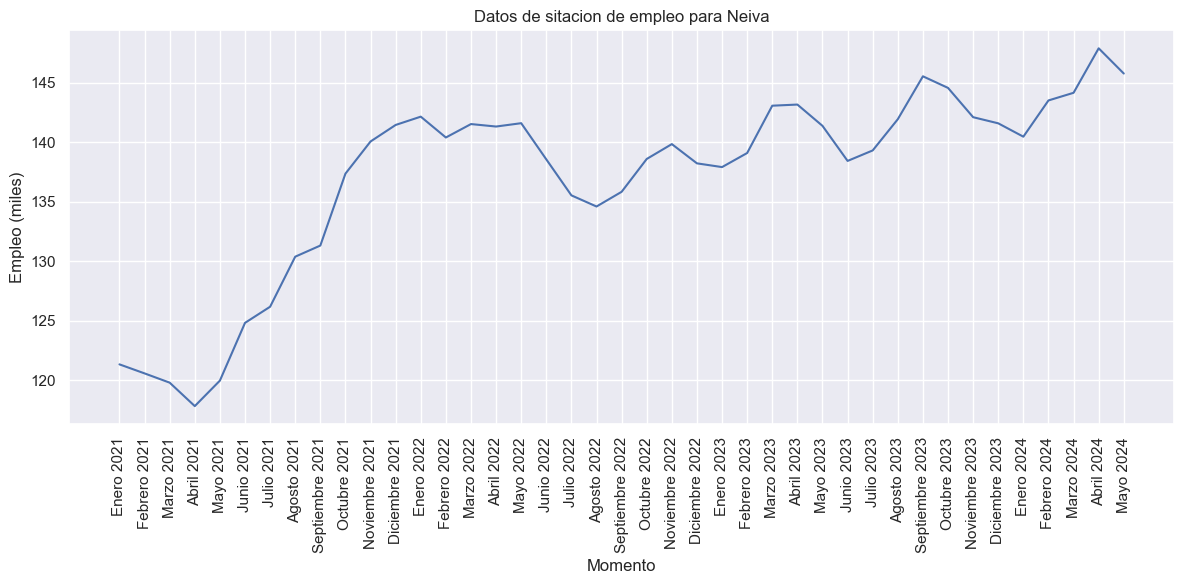

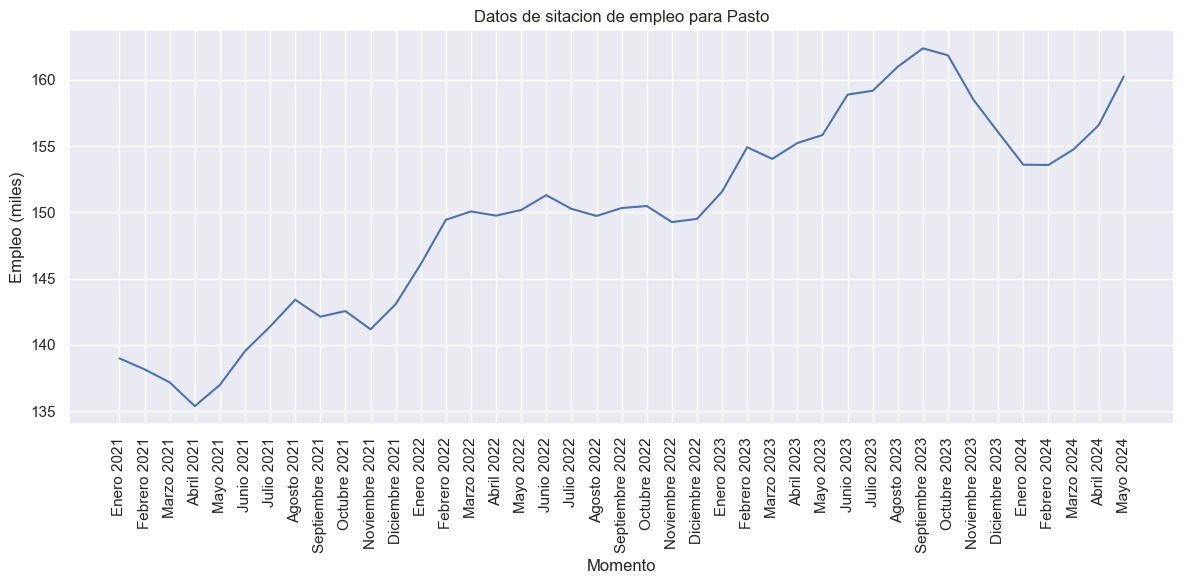

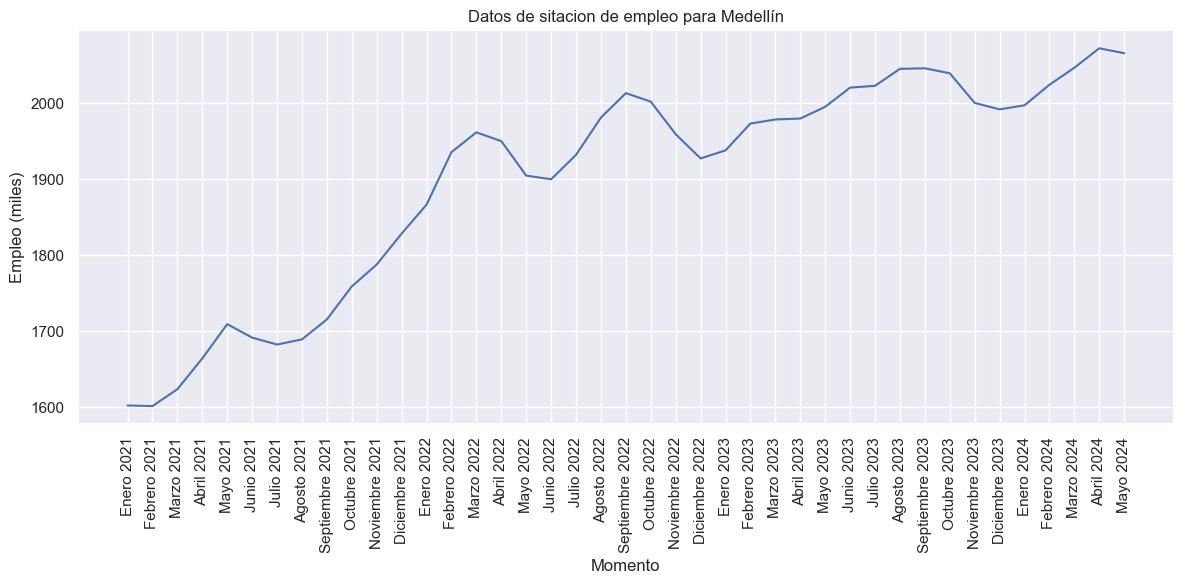

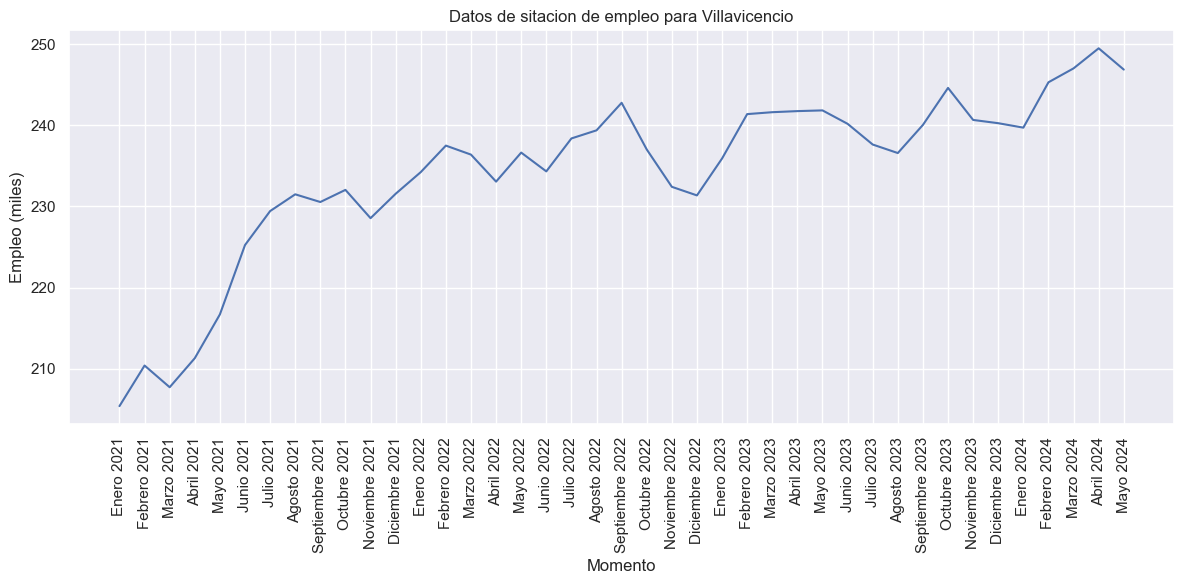

In [16]:
def plot_city_month(city):
    '''
    This function plots the employment data for a given city
    '''
    plt.figure(figsize=(12, 6))
    plt.plot(df_sheet1_cleaned.columns[2:], df_sheet1_cleaned[df_sheet1_cleaned['Ciudad'] == city].values[0][2:])
    plt.title(f'Datos de sitacion de empleo para {city}')
    plt.xticks(rotation=90)
    plt.xlabel('Momento')
    plt.ylabel('Empleo (miles)')
    plt.tight_layout()
    plt.show()
plot_city_month('Neiva')
plot_city_month('Pasto')
plot_city_month('Medellín')
plot_city_month('Villavicencio')